<div style="text-align: left; background-color:#bcebf7; font-family:Arial; color:black; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 32px">PROJECT: ANALYSE AND CLASSIFY THE AUTHENTICITY OF ONLINE NEWS IN BIG DATA CONTEXT</div>
<div style="text-align: left; background-color:#ee9ef7; font-family: Arial; color:black; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px"> EXPLORATORY DATA ANALYSIS: GETTING INSIGHTS FROM DATA</div>

### 1. Import library

In [24]:
import pandas as pd
import numpy as np
import statistics
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from Visualize.make_dataframe import make_dataframe, make_raw_dataframe
from Visualize.retrieve_topic import retrieve_topic
from Visualize.visualize_frequency_words import visualize_frequency_words
from Visualize.utils import *

### 2. Get data from Mongodb and convert to dataframe

In [25]:
df = pd.DataFrame()
df = make_dataframe()
df.head(2)

,title,content,url,label,imageURL,domain,topic,date
0,Lập đội phản ứng nhanh chống dịch viêm phổi Vũ...,"[chính_phủ, lập, đội, phản_ứng, chống, dịch, v...",https://vnexpress.net/lap-doi-phan-ung-nhanh-c...,0,https://i2-vnexpress.vnecdn.net/2020/01/28/kie...,vnexpress.net,Thời sự,2020-01-28
1,Kẹt xe gần 10 km hai bên cầu Rạch Miễu,"[bến, trex, mái, ôtô, trở_lại, tp, hcm, đông, ...",https://vnexpress.net/ket-xe-gan-10-km-hai-ben...,0,https://i2-vnexpress.vnecdn.net/2020/01/28/ket...,vnexpress.net,Thời sự,2020-01-28


### 3. Get brief information

3.1 Data shape and features

In [26]:
print("Data shape:",df.shape)
print("Data features:", df.columns.tolist())

Data shape: (9091, 8)
Data features: ['title', 'content', 'url', 'label', 'imageURL', 'domain', 'topic', 'date']


3.2 Distribution of classes

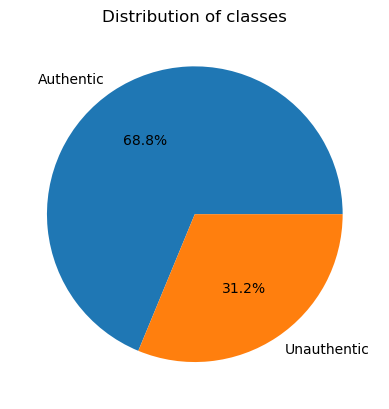

In [27]:
count = [df['label'].value_counts()[0], df['label'].value_counts()[1]]
labels = ['Authentic', 'Unauthentic']
plt.pie(count, labels = labels, autopct='%1.1f%%');
plt.title('Distribution of classes');

3.3 Distribution of topics

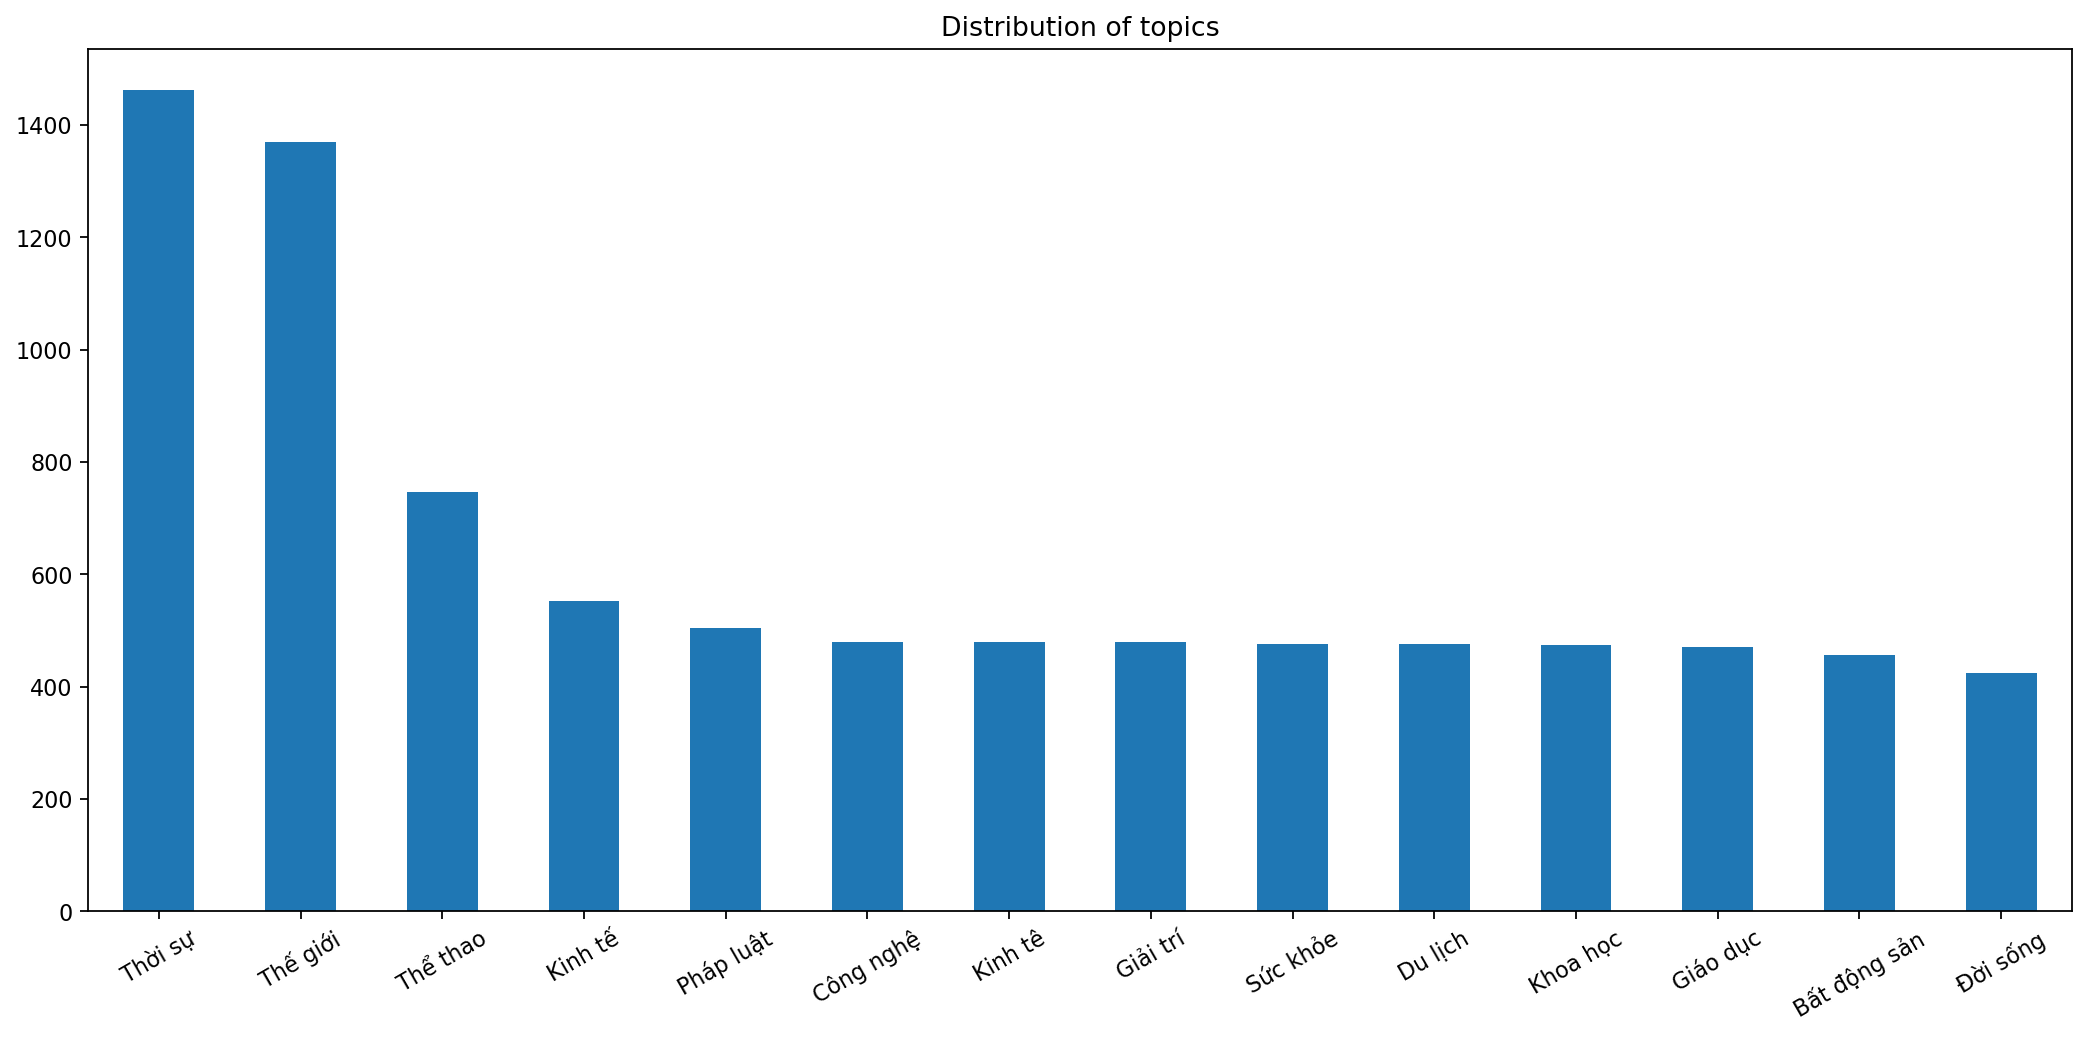

In [28]:
plt.figure(figsize = (16,7), dpi = 160)
df['topic'].value_counts().plot(kind = 'bar');
plt.xticks(rotation = 30, horizontalalignment = 'center')
plt.title('Distribution of topics');

### 4. Text analysis

4.1 Statistical information of text length

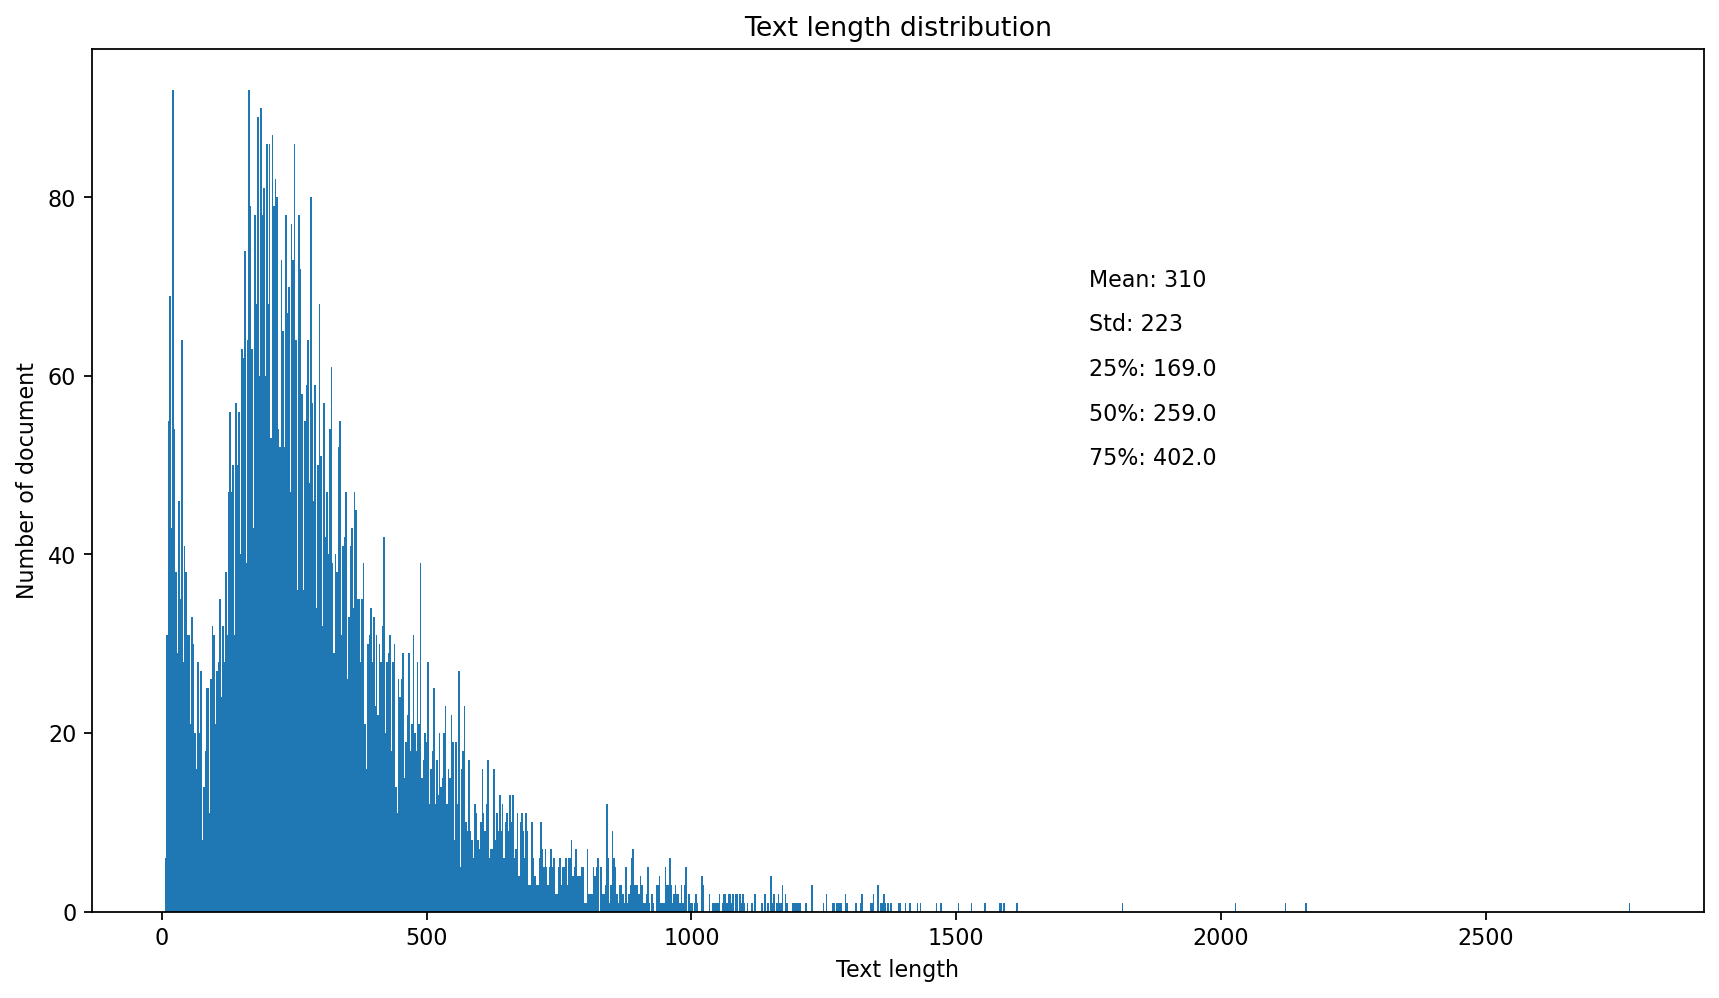

In [29]:
doc_lens = [len(d) for d in df.content]
plt.figure(figsize=(13,7), dpi=160)
plt.locator_params(axis='x', nbins = 10)
plt.text(1750, 70, f'Mean: {round(statistics.mean(doc_lens))}')
plt.text(1750, 65, f'Std: {round(statistics.stdev(doc_lens))}')
plt.text(1750, 60, f'25%: {statistics.quantiles(doc_lens)[0]}')
plt.text(1750, 55, f'50%: {statistics.quantiles(doc_lens)[1]}')
plt.text(1750, 50, f'75%: {statistics.quantiles(doc_lens)[2]}')
plt.hist(doc_lens, bins = 1000);
plt.title("Text length distribution");
plt.xlabel("Text length");
plt.ylabel("Number of document");

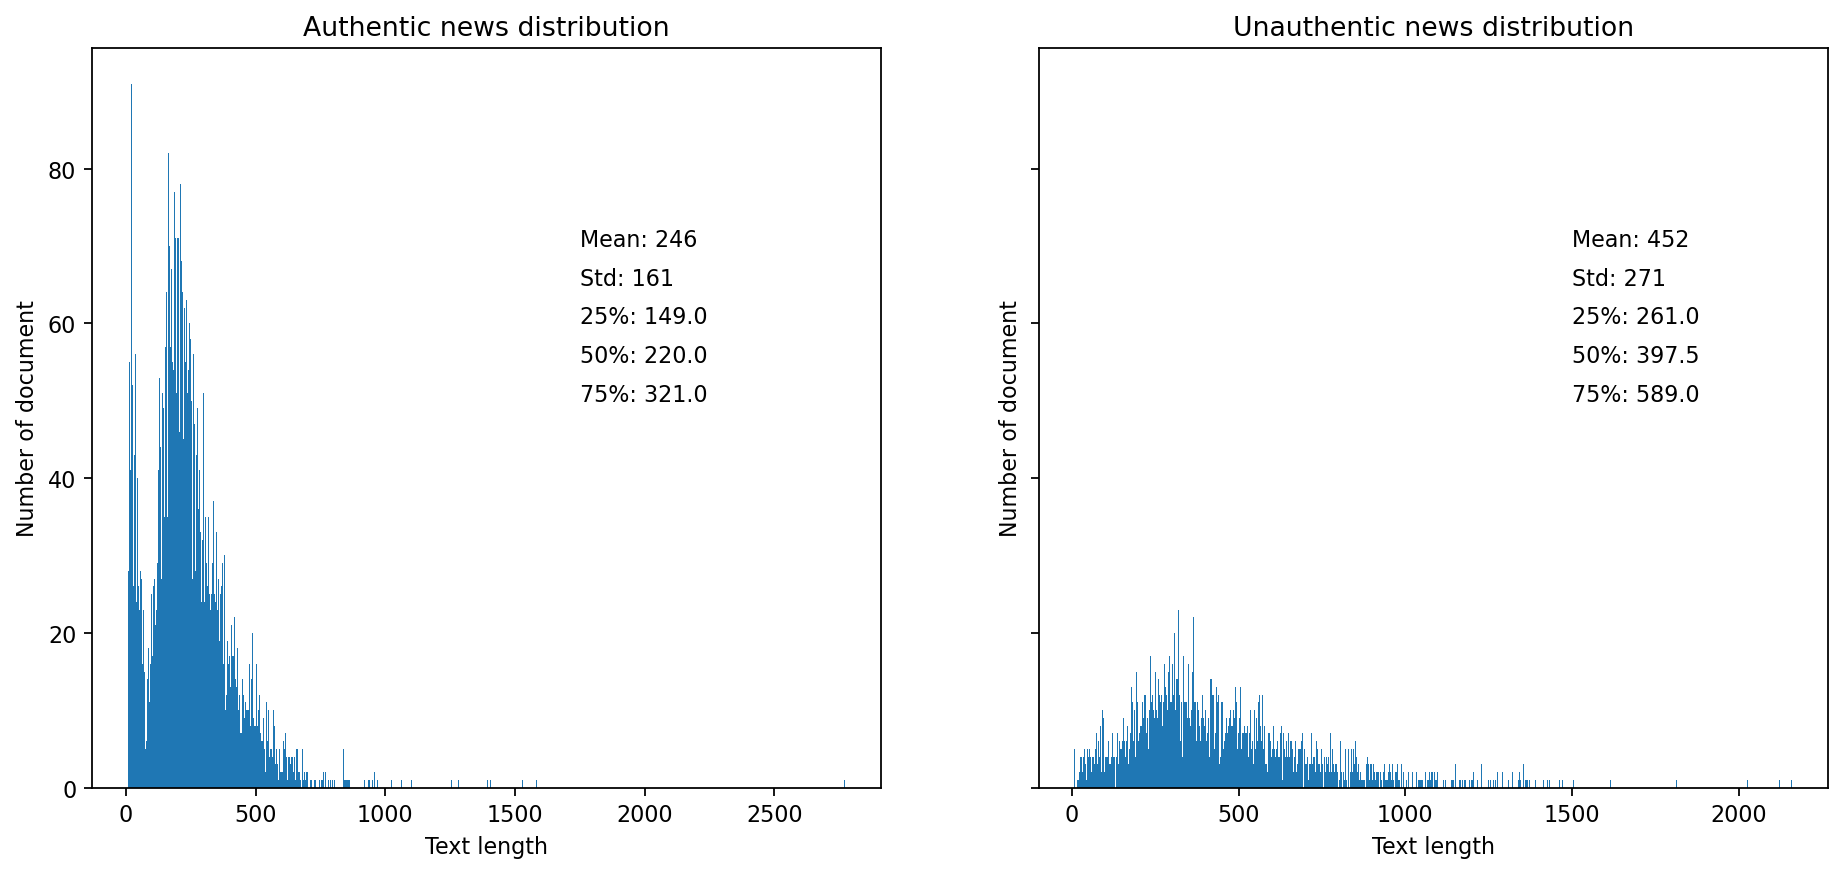

In [30]:
unauth_df = df[df['label'] == 1]
auth_df = df[df['label'] == 0]
unauth_doc_lens = [len(d) for d in unauth_df.content]
auth_doc_lens = [len(d) for d in auth_df.content]

fig, axes = plt.subplots(1, 2, figsize=(14,6), dpi=160, sharey = True)

axes[0].text(1750, 70, f'Mean: {round(statistics.mean(auth_doc_lens))}')
axes[0].text(1750, 65, f'Std: {round(statistics.stdev(auth_doc_lens))}')
axes[0].text(1750, 60, f'25%: {(statistics.quantiles(auth_doc_lens)[0])}')
axes[0].text(1750, 55, f'50%: {(statistics.quantiles(auth_doc_lens)[1])}')
axes[0].text(1750, 50, f'75%: {(statistics.quantiles(auth_doc_lens)[2])}')
axes[0].hist(auth_doc_lens, bins = 1000);
axes[0].set_title("Authentic news distribution");
axes[0].set_xlabel("Text length");
axes[0].set_ylabel("Number of document");

axes[1].text(1500, 70, f'Mean: {round(statistics.mean(unauth_doc_lens))}')
axes[1].text(1500, 65, f'Std: {round(statistics.stdev(unauth_doc_lens))}')
axes[1].text(1500, 60, f'25%: {(statistics.quantiles(unauth_doc_lens)[0])}')
axes[1].text(1500, 55, f'50%: {(statistics.quantiles(unauth_doc_lens)[1])}')
axes[1].text(1500, 50, f'75%: {(statistics.quantiles(unauth_doc_lens)[2])}')
axes[1].hist(unauth_doc_lens, bins = 1000);
axes[1].set_title("Unauthentic news distribution");
axes[1].set_xlabel("Text length");
axes[1].set_ylabel("Number of document");

4.2 Statistical information of Lexical Diversity


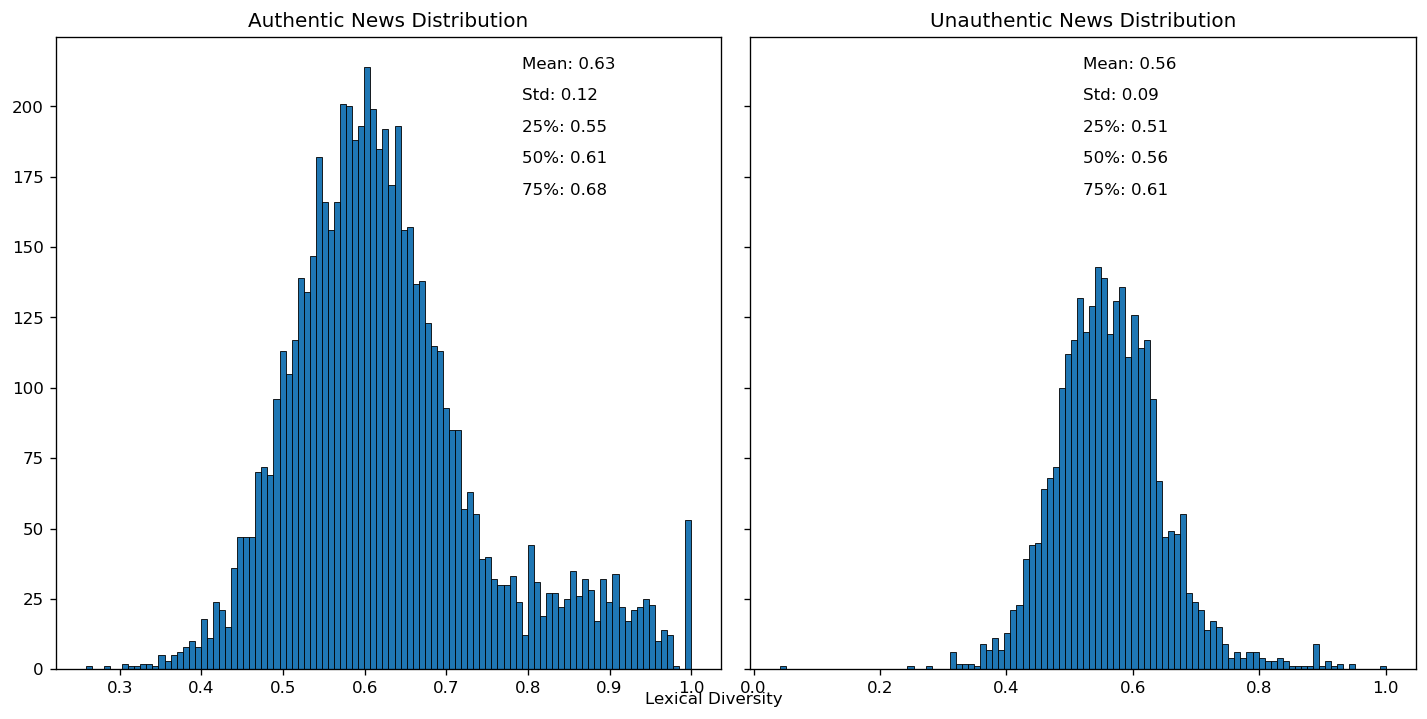

In [31]:

# Calculate lexical diversity
unauth_doc_lexical_diversity = [cal_TypeTokenRatio(d) for d in unauth_df.content]
auth_doc_lexical_diversity = [cal_TypeTokenRatio(d) for d in auth_df.content]

# Create subplots with a reasonable size
fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=120, sharey=True)

# Real news distribution subplot
axes[0].text(0.7, 0.95, f'Mean: {round(statistics.mean(auth_doc_lexical_diversity), 2)}', transform=axes[0].transAxes)
axes[0].text(0.7, 0.90, f'Std: {round(statistics.stdev(auth_doc_lexical_diversity), 2)}', transform=axes[0].transAxes)
axes[0].text(0.7, 0.85, f'25%: {round(statistics.quantiles(auth_doc_lexical_diversity)[0], 2)}', transform=axes[0].transAxes)
axes[0].text(0.7, 0.80, f'50%: {round(statistics.quantiles(auth_doc_lexical_diversity)[1], 2)}', transform=axes[0].transAxes)
axes[0].text(0.7, 0.75, f'75%: {round(statistics.quantiles(auth_doc_lexical_diversity)[2], 2)}', transform=axes[0].transAxes)
axes[0].hist(auth_doc_lexical_diversity, bins=100, edgecolor='black', linewidth=0.5)
axes[0].set_title("Authentic News Distribution")

# Fake news distribution subplot
axes[1].text(0.5, 0.95, f'Mean: {round(statistics.mean(unauth_doc_lexical_diversity), 2)}', transform=axes[1].transAxes)
axes[1].text(0.5, 0.90, f'Std: {round(statistics.stdev(unauth_doc_lexical_diversity), 2)}', transform=axes[1].transAxes)
axes[1].text(0.5, 0.85, f'25%: {round(statistics.quantiles(unauth_doc_lexical_diversity)[0], 2)}', transform=axes[1].transAxes)
axes[1].text(0.5, 0.80, f'50%: {round(statistics.quantiles(unauth_doc_lexical_diversity)[1], 2)}', transform=axes[1].transAxes)
axes[1].text(0.5, 0.75, f'75%: {round(statistics.quantiles(unauth_doc_lexical_diversity)[2], 2)}', transform=axes[1].transAxes)
axes[1].hist(unauth_doc_lexical_diversity, bins=100, edgecolor='black', linewidth=0.5)
axes[1].set_title("Unauthentic News Distribution")

# Set common y-axis label
fig.text(0.5, 0.02, 'Lexical Diversity', ha='center', va='center')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


4.3 Statistical information of Readability


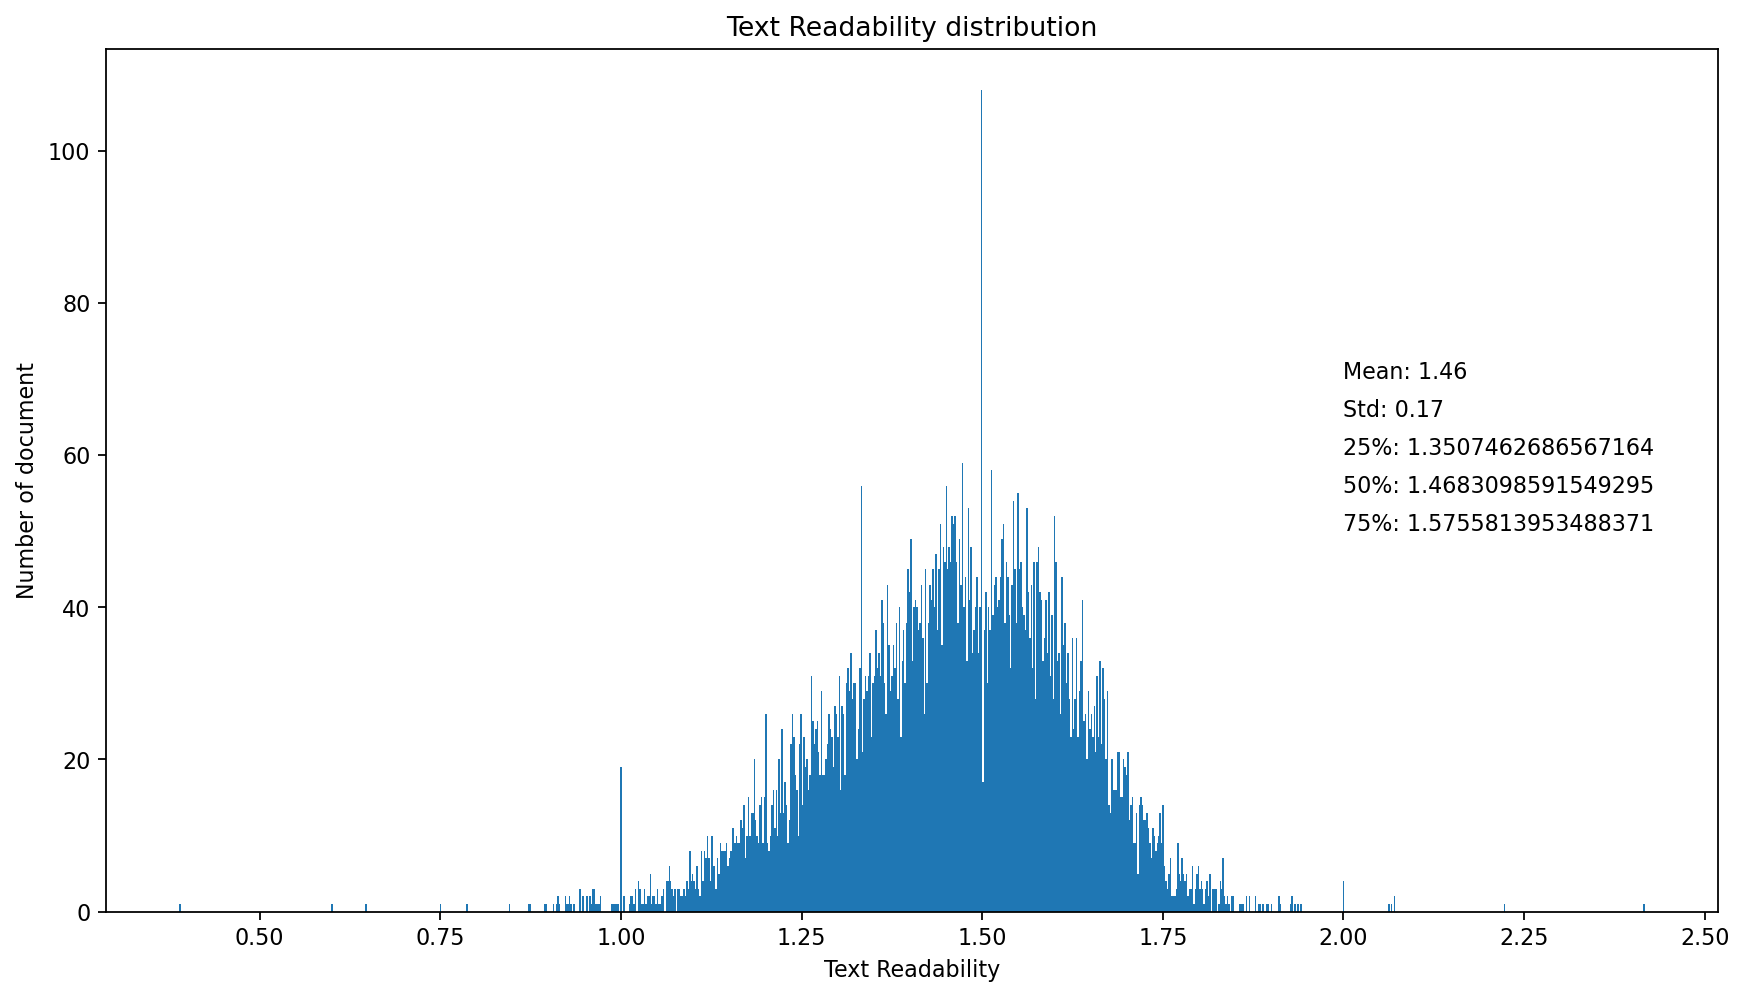

In [32]:
doc_readabitily = [cal_readability(d) for d in df.content]
plt.figure(figsize=(13,7), dpi=160)
plt.locator_params(axis='x', nbins = 10)
plt.text(2, 70, f'Mean: {round(statistics.mean(doc_readabitily), 2)}')
plt.text(2, 65, f'Std: {round(statistics.stdev(doc_readabitily), 2)}')
plt.text(2, 60, f'25%: {statistics.quantiles(doc_readabitily)[0]}')
plt.text(2, 55, f'50%: {statistics.quantiles(doc_readabitily)[1]}')
plt.text(2, 50, f'75%: {statistics.quantiles(doc_readabitily)[2]}')
plt.hist(doc_readabitily, bins = 1000);
plt.title("Text Readability distribution");
plt.xlabel("Text Readability");
plt.ylabel("Number of document");



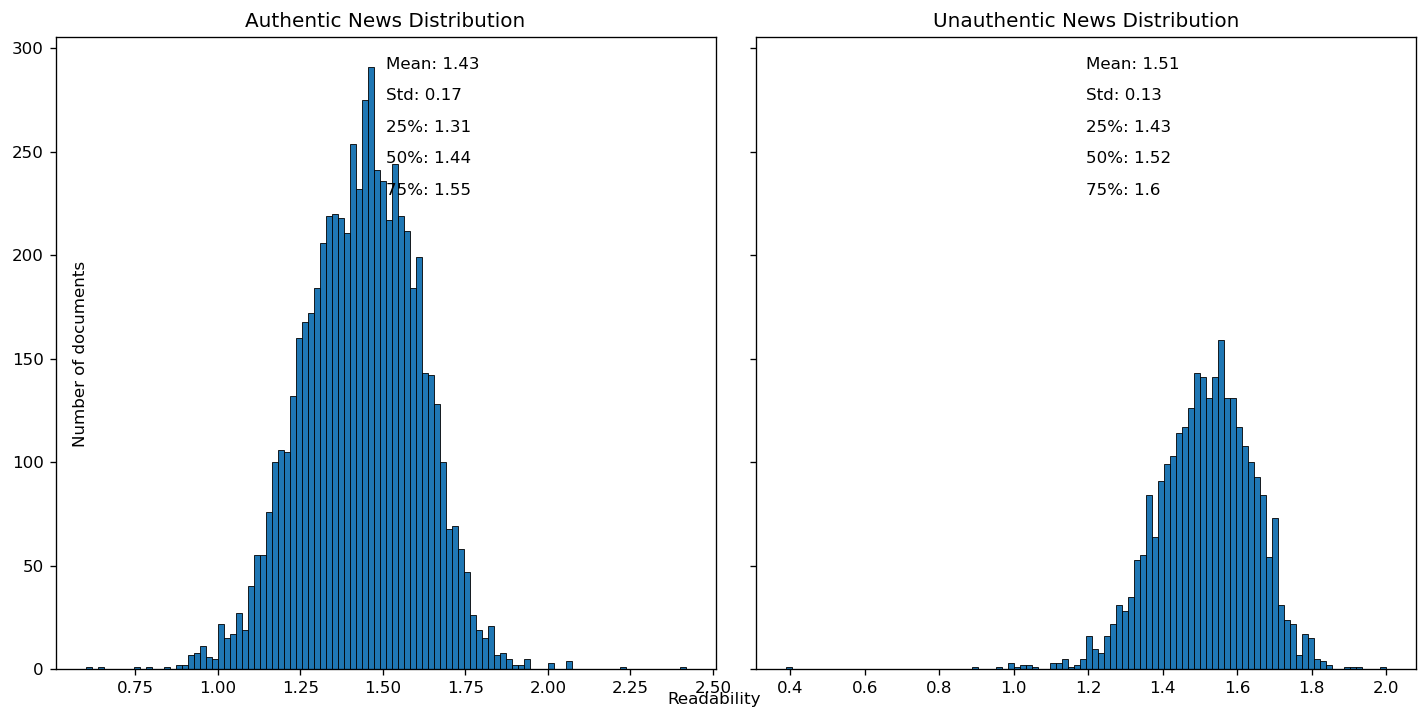

In [33]:
# Calculate readability
unauth_doc_readability = [cal_readability(d) for d in unauth_df.content]
auth_doc_readability = [cal_readability(d) for d in auth_df.content]

# Create subplots with a reasonable size
fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=120, sharey=True)

# Real news distribution subplot
axes[0].text(0.5, 0.95, f'Mean: {round(statistics.mean(auth_doc_readability), 2)}', transform=axes[0].transAxes)
axes[0].text(0.5, 0.90, f'Std: {round(statistics.stdev(auth_doc_readability), 2)}', transform=axes[0].transAxes)
axes[0].text(0.5, 0.85, f'25%: {round(statistics.quantiles(auth_doc_readability)[0], 2)}', transform=axes[0].transAxes)
axes[0].text(0.5, 0.80, f'50%: {round(statistics.quantiles(auth_doc_readability)[1], 2)}', transform=axes[0].transAxes)
axes[0].text(0.5, 0.75, f'75%: {round(statistics.quantiles(auth_doc_readability)[2], 2)}', transform=axes[0].transAxes)
axes[0].hist(auth_doc_readability, bins=100, edgecolor='black', linewidth=0.5)
axes[0].set_title("Authentic News Distribution")

# Fake news distribution subplot
axes[1].text(0.5, 0.95, f'Mean: {round(statistics.mean(unauth_doc_readability), 2)}', transform=axes[1].transAxes)
axes[1].text(0.5, 0.90, f'Std: {round(statistics.stdev(unauth_doc_readability), 2)}', transform=axes[1].transAxes)
axes[1].text(0.5, 0.85, f'25%: {round(statistics.quantiles(unauth_doc_readability)[0], 2)}', transform=axes[1].transAxes)
axes[1].text(0.5, 0.80, f'50%: {round(statistics.quantiles(unauth_doc_readability)[1], 2)}', transform=axes[1].transAxes)
axes[1].text(0.5, 0.75, f'75%: {round(statistics.quantiles(unauth_doc_readability)[2], 2)}', transform=axes[1].transAxes)
axes[1].hist(unauth_doc_readability, bins=100, edgecolor='black', linewidth=0.5)
axes[1].set_title("Unauthentic News Distribution")



# Set common y-axis label
fig.text(0.5, 0.02, 'Readability', ha='center', va='center')

# Set name for y label
fig.text(0.06, 0.5, 'Number of documents', ha='center', va='center', rotation='vertical')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


4.5 Statistical information of Syntactic Complexity

In [34]:
df_raw = pd.DataFrame()
df_raw = make_raw_dataframe()

unauth_raw_df = df_raw[df_raw['label'] == 1]
auth_raw_df = df_raw[df_raw['label'] == 0]

In [35]:
unauth_doc_syntactic_complexity = [cal_syntactic_complexity(d) for d in unauth_raw_df.content if d]
auth_doc_syntatic_complexity = [cal_syntactic_complexity(d) for d in auth_raw_df.content if d]

4.5.1 Average Sentence Length

In [36]:
unauth_doc_syntactic_complexity_avg_sent_len = [d['average_sentence_length'] for d in unauth_doc_syntactic_complexity]
auth_doc_syntatic_complexity_avg_sent_len = [d['average_sentence_length'] for d in auth_doc_syntatic_complexity]

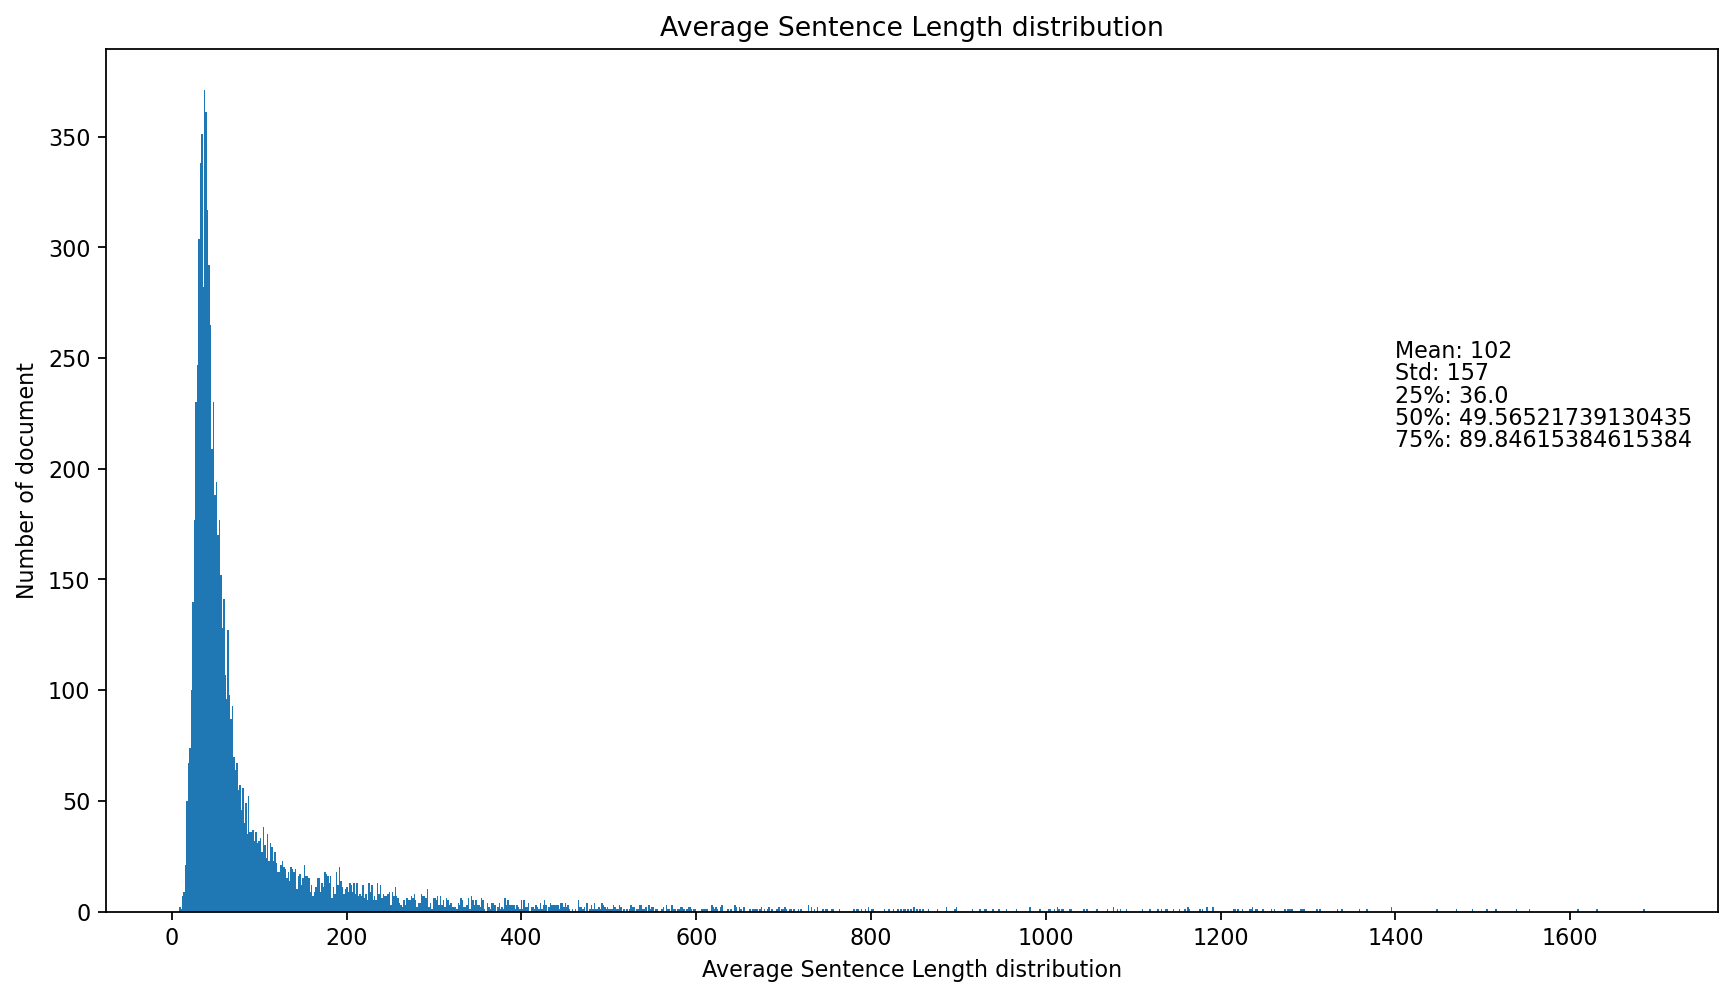

In [48]:
doc_syntactic_complexity = [cal_syntactic_complexity(d) for d in df_raw.content if d]
doc_average_sentence_length = [d['average_sentence_length'] for d in doc_syntactic_complexity]
plt.figure(figsize=(13,7), dpi=160)
plt.locator_params(axis='x', nbins = 10)
plt.text(1400, 250, f'Mean: {round(statistics.mean(doc_average_sentence_length))}')
plt.text(1400, 240, f'Std: {round(statistics.stdev(doc_average_sentence_length))}')
plt.text(1400, 230, f'25%: {statistics.quantiles(doc_average_sentence_length)[0]}')
plt.text(1400, 220, f'50%: {statistics.quantiles(doc_average_sentence_length)[1]}')
plt.text(1400, 210, f'75%: {statistics.quantiles(doc_average_sentence_length)[2]}')
plt.hist(doc_average_sentence_length, bins = 1000);
plt.title("Average Sentence Length distribution");
plt.xlabel("Average Sentence Length distribution");
plt.ylabel("Number of document");

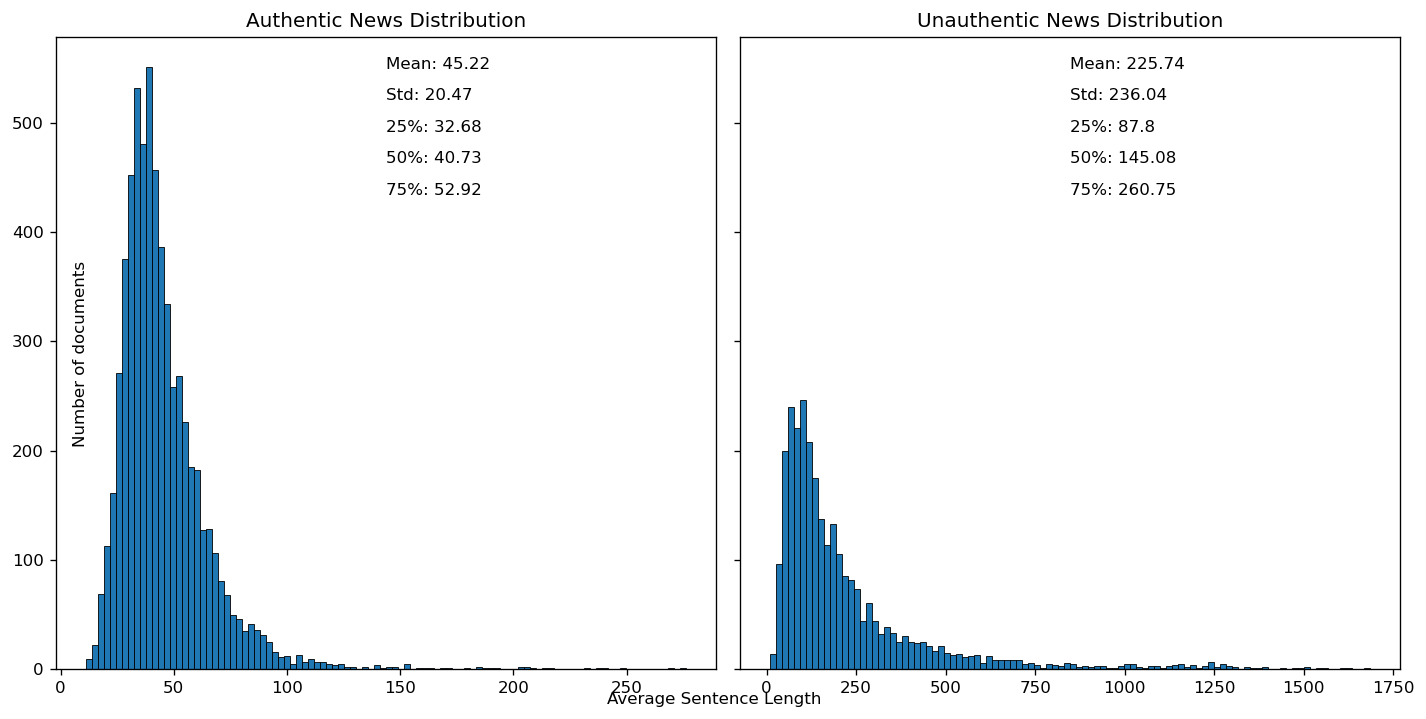

In [38]:
# Create subplots with a reasonable size
fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=120, sharey=True)

# Real news distribution subplot
axes[0].text(0.5, 0.95, f'Mean: {round(statistics.mean(auth_doc_syntatic_complexity_avg_sent_len), 2)}', transform=axes[0].transAxes)
axes[0].text(0.5, 0.90, f'Std: {round(statistics.stdev(auth_doc_syntatic_complexity_avg_sent_len), 2)}', transform=axes[0].transAxes)
axes[0].text(0.5, 0.85, f'25%: {round(statistics.quantiles(auth_doc_syntatic_complexity_avg_sent_len)[0], 2)}', transform=axes[0].transAxes)
axes[0].text(0.5, 0.80, f'50%: {round(statistics.quantiles(auth_doc_syntatic_complexity_avg_sent_len)[1], 2)}', transform=axes[0].transAxes)
axes[0].text(0.5, 0.75, f'75%: {round(statistics.quantiles(auth_doc_syntatic_complexity_avg_sent_len)[2], 2)}', transform=axes[0].transAxes)
axes[0].hist(auth_doc_syntatic_complexity_avg_sent_len, bins=100, edgecolor='black', linewidth=0.5)
axes[0].set_title("Authentic News Distribution")

# Fake news distribution subplot
axes[1].text(0.5, 0.95, f'Mean: {round(statistics.mean(unauth_doc_syntactic_complexity_avg_sent_len), 2)}', transform=axes[1].transAxes)
axes[1].text(0.5, 0.90, f'Std: {round(statistics.stdev(unauth_doc_syntactic_complexity_avg_sent_len), 2)}', transform=axes[1].transAxes)
axes[1].text(0.5, 0.85, f'25%: {round(statistics.quantiles(unauth_doc_syntactic_complexity_avg_sent_len)[0], 2)}', transform=axes[1].transAxes)
axes[1].text(0.5, 0.80, f'50%: {round(statistics.quantiles(unauth_doc_syntactic_complexity_avg_sent_len)[1], 2)}', transform=axes[1].transAxes)
axes[1].text(0.5, 0.75, f'75%: {round(statistics.quantiles(unauth_doc_syntactic_complexity_avg_sent_len)[2], 2)}', transform=axes[1].transAxes)
axes[1].hist(unauth_doc_syntactic_complexity_avg_sent_len, bins=100, edgecolor='black', linewidth=0.5)
axes[1].set_title("Unauthentic News Distribution")

# Set common y-axis label
fig.text(0.5, 0.02, 'Average Sentence Length', ha='center', va='center')

# Set name for y label
fig.text(0.06, 0.5, 'Number of documents', ha='center', va='center', rotation='vertical')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


4.5.2 Average Clause Length

In [39]:
unauth_doc_avg_clause_len= [d['average_clause_length'] for d in unauth_doc_syntactic_complexity]
auth_doc_avg_clause_len = [d['average_clause_length'] for d in auth_doc_syntatic_complexity]

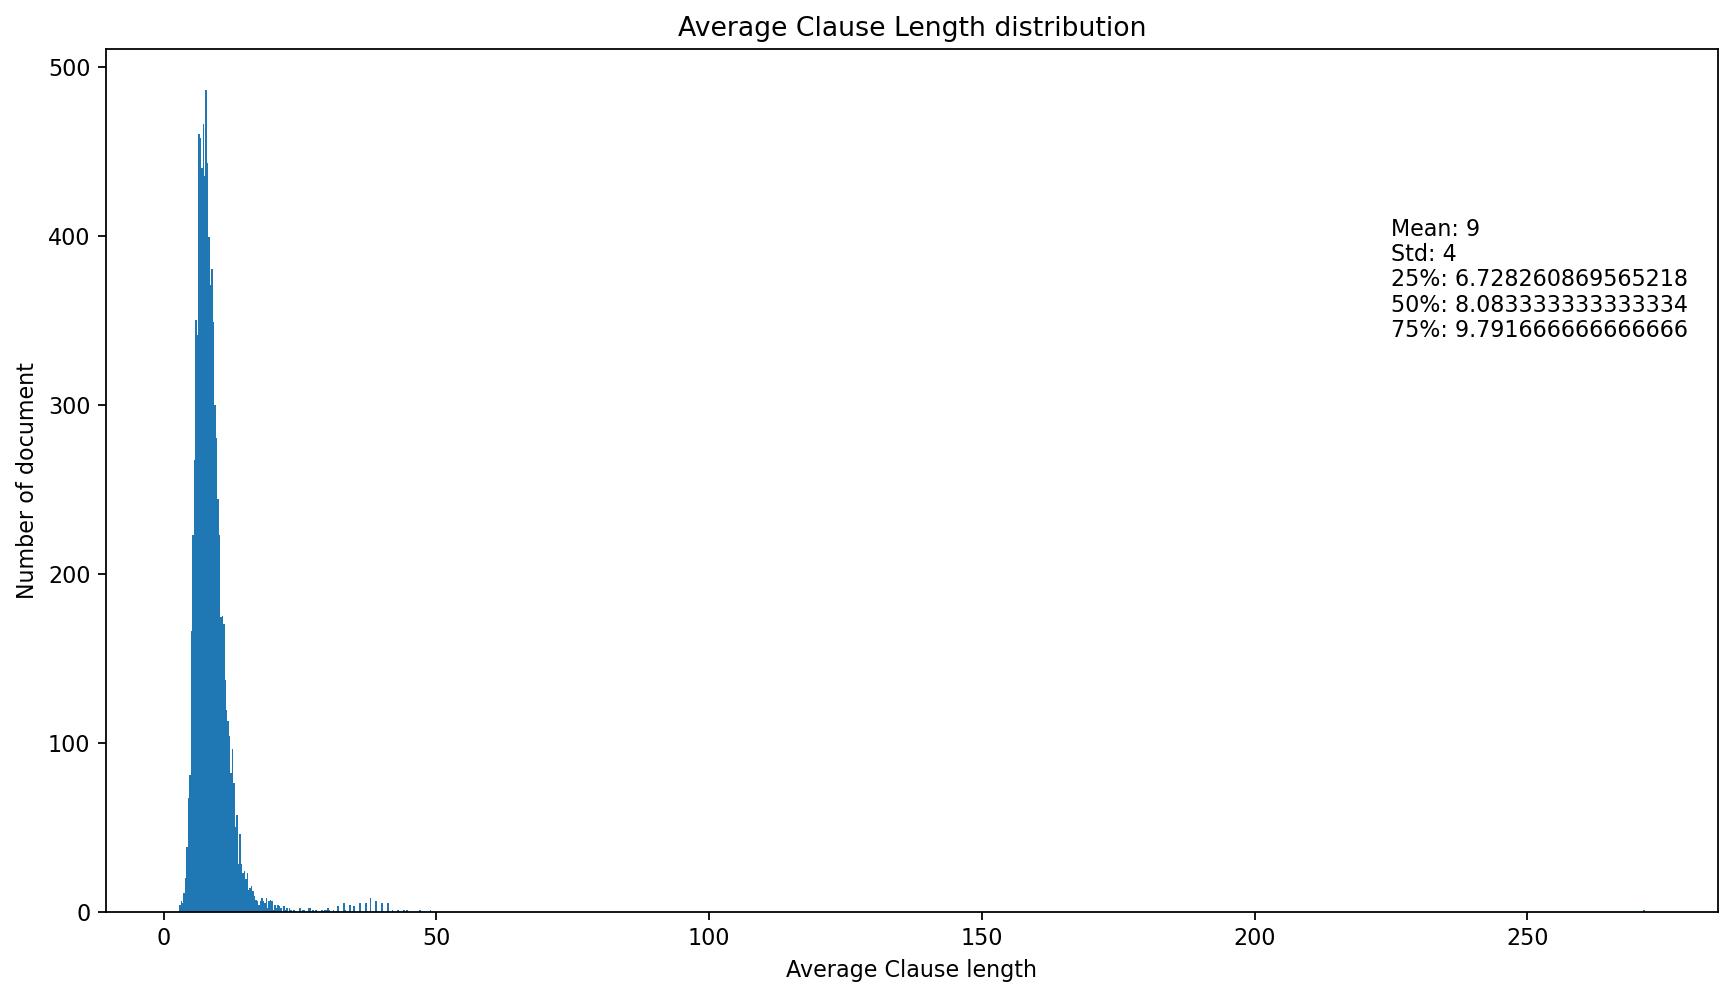

In [53]:

doc_average_clause_length = [d['average_clause_length'] for d in doc_syntactic_complexity]
plt.figure(figsize=(13,7), dpi=160)
plt.locator_params(axis='x', nbins = 10)
plt.text(225, 400, f'Mean: {round(statistics.mean(doc_average_clause_length))}')
plt.text(225, 385, f'Std: {round(statistics.stdev(doc_average_clause_length))}')
plt.text(225, 370, f'25%: {statistics.quantiles(doc_average_clause_length)[0]}')
plt.text(225, 355, f'50%: {statistics.quantiles(doc_average_clause_length)[1]}')
plt.text(225, 340, f'75%: {statistics.quantiles(doc_average_clause_length)[2]}')
plt.hist(doc_average_clause_length, bins = 1000);
plt.title("Average Clause Length distribution");
plt.xlabel("Average Clause length");
plt.ylabel("Number of document");

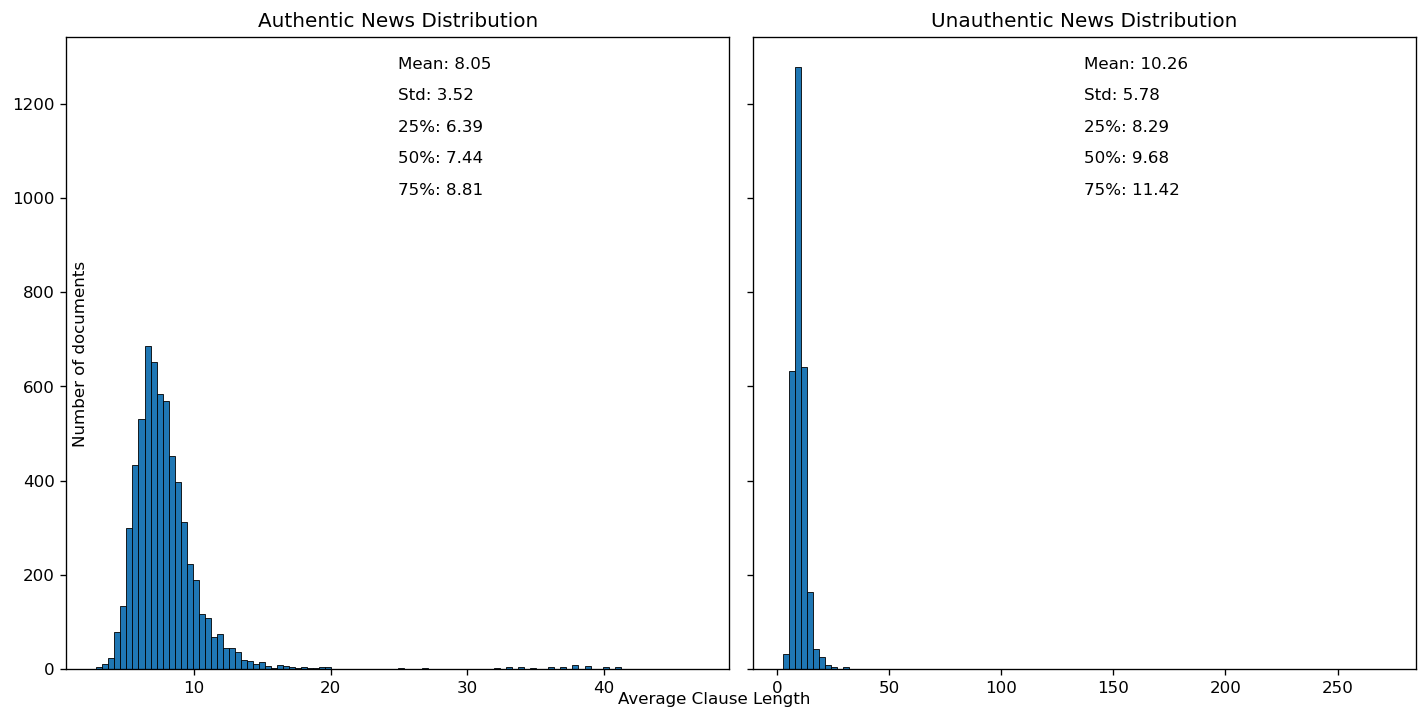

In [41]:
# Create subplots with a reasonable size
fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=120, sharey=True)

# Real news distribution subplot
axes[0].text(0.5, 0.95, f'Mean: {round(statistics.mean(auth_doc_avg_clause_len), 2)}', transform=axes[0].transAxes)
axes[0].text(0.5, 0.90, f'Std: {round(statistics.stdev(auth_doc_avg_clause_len), 2)}', transform=axes[0].transAxes)
axes[0].text(0.5, 0.85, f'25%: {round(statistics.quantiles(auth_doc_avg_clause_len)[0], 2)}', transform=axes[0].transAxes)
axes[0].text(0.5, 0.80, f'50%: {round(statistics.quantiles(auth_doc_avg_clause_len)[1], 2)}', transform=axes[0].transAxes)
axes[0].text(0.5, 0.75, f'75%: {round(statistics.quantiles(auth_doc_avg_clause_len)[2], 2)}', transform=axes[0].transAxes)
axes[0].hist(auth_doc_avg_clause_len, bins=100, edgecolor='black', linewidth=0.5)
axes[0].set_title("Authentic News Distribution")

# Fake news distribution subplot
axes[1].text(0.5, 0.95, f'Mean: {round(statistics.mean(unauth_doc_avg_clause_len), 2)}', transform=axes[1].transAxes)
axes[1].text(0.5, 0.90, f'Std: {round(statistics.stdev(unauth_doc_avg_clause_len), 2)}', transform=axes[1].transAxes)
axes[1].text(0.5, 0.85, f'25%: {round(statistics.quantiles(unauth_doc_avg_clause_len)[0], 2)}', transform=axes[1].transAxes)
axes[1].text(0.5, 0.80, f'50%: {round(statistics.quantiles(unauth_doc_avg_clause_len)[1], 2)}', transform=axes[1].transAxes)
axes[1].text(0.5, 0.75, f'75%: {round(statistics.quantiles(unauth_doc_avg_clause_len)[2], 2)}', transform=axes[1].transAxes)
axes[1].hist(unauth_doc_avg_clause_len, bins=100, edgecolor='black', linewidth=0.5)
axes[1].set_title("Unauthentic News Distribution")

# Set common y-axis label
fig.text(0.5, 0.02, 'Average Clause Length', ha='center', va='center')

fig.text(0.06, 0.5, 'Number of documents', ha='center', va='center', rotation='vertical')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### 5. Use topic extraction to find out news trends according to each topic in the collected dataset

5.1 Topic extraction for each news

In [42]:
df['topic_extract'] = pd.Series()
for i in range(df.shape[0]):
    df['topic_extract'][i] = retrieve_topic(df['content'][i])

5.2 With each type of authentic or unauthentic topic, visualize their news trends

5.2.1 News trend in some specific topics

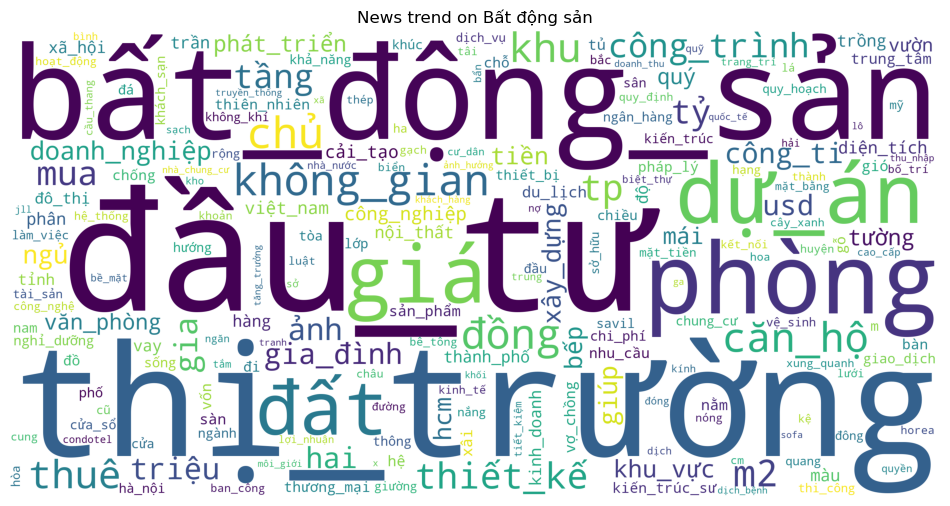

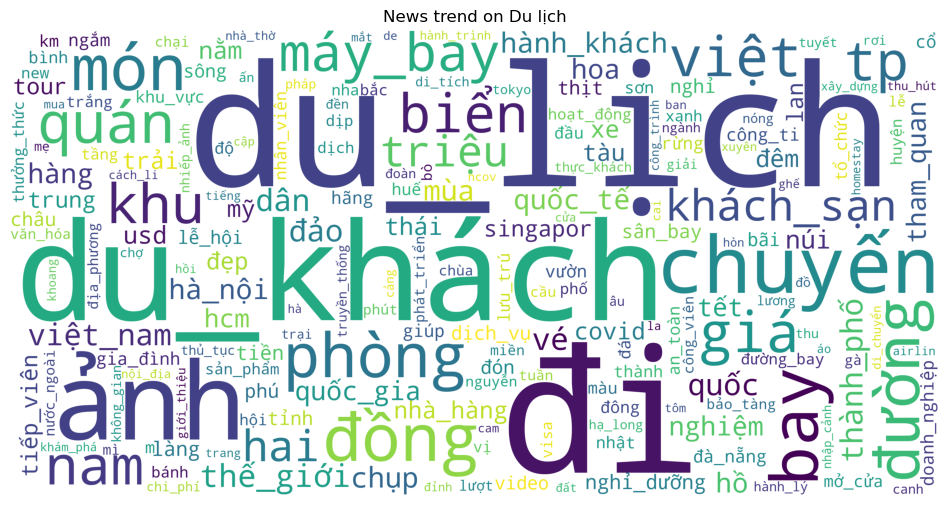

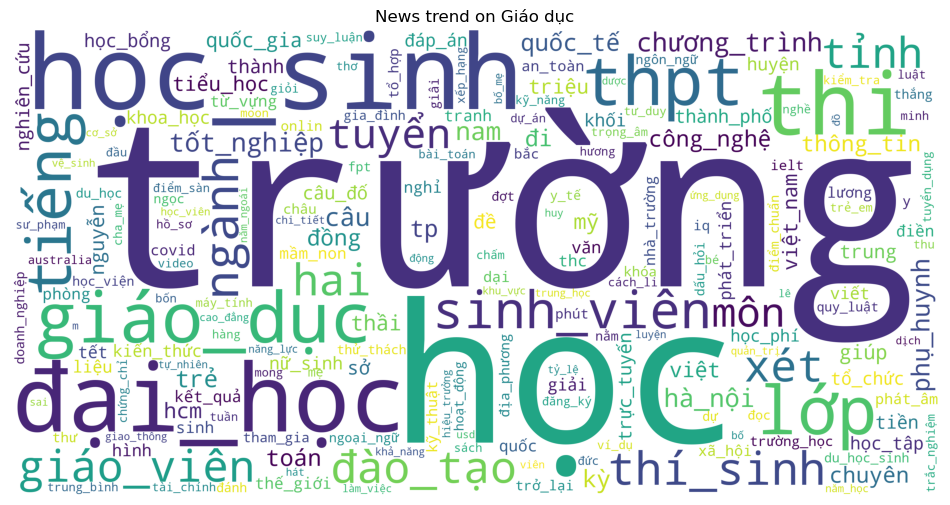

In [43]:
topics = ['Bất động sản', 'Du lịch', 'Giáo dục']
plt.rcParams['figure.figsize'] = [12, 7]
grouped_df = df.groupby(['topic'])
for t in topics:
    tmp = grouped_df.get_group(t)
    visualize_frequency_words(tmp, 'topic_extract', f'News trend on {t}')
    plt.show()

5.2.2 News trend on authentic and unauthentic in similar topics

In [44]:
auth_topics = list(auth_df['topic'].unique())
auth_topics.remove(None)
unauth_topics = list(unauth_df['topic'].unique())
unauth_topics.remove(None)
general_topic = []
for t in unauth_topics:
    if t in auth_topics:
        general_topic.append(t)

general_topic

['Thời sự', 'Thế giới', 'Pháp luật', 'Thể thao']

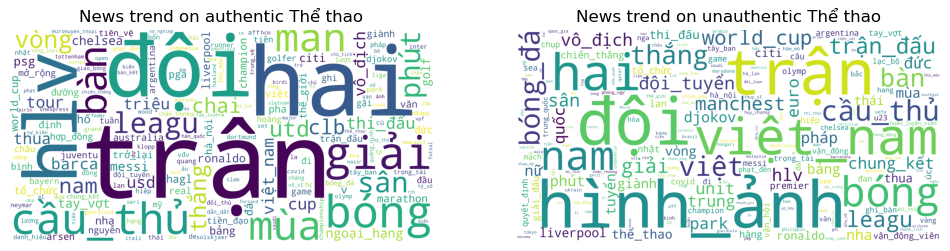

In [45]:
plt.rcParams['figure.figsize'] = [12, 7]
grouped_df = df.groupby(['topic'])
for t in general_topic[3:]:
    tmp = grouped_df.get_group(t)
    auth = tmp[tmp['label'] == 0]
    unauth = tmp[tmp['label'] == 1]
    plt.subplot(1, 2, 1)
    visualize_frequency_words(auth, 'topic_extract', f'News trend on authentic {t}')
    plt.subplot(1, 2, 2)
    visualize_frequency_words(unauth, 'topic_extract', f'News trend on unauthentic {t}')
    plt.show()